In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import cv2
import tifffile

In [2]:
def make_cell(img, cell_size_min, cell_size_max):
    curr_mean = np.random.uniform(0, img.shape[0], 2)
    curr_cov = np.array([[np.random.uniform(cell_size_min, cell_size_max), 0], [0, np.random.uniform(cell_size_min, cell_size_max)]])
    curr_theta = np.random.uniform(0, np.pi)
    curr_eig = np.array([[np.cos(curr_theta), -np.sin(curr_theta)], [np.sin(curr_theta), np.cos(curr_theta)]])
    curr_cov = np.matmul(np.matmul(curr_eig, curr_cov), curr_eig.T)
    curr_dist = scipy.stats.multivariate_normal(curr_mean, curr_cov)
    xv, yv = np.meshgrid(np.linspace(0, img.shape[0] - 1, img.shape[0]), np.linspace(0, img.shape[0] - 1, img.shape[0]))
    pos = np.dstack((xv, yv))
    curr_cell = curr_dist.pdf(pos)
    curr_int = np.random.uniform(0, 1)
    curr_cell = (curr_cell - np.min(curr_cell))/(np.max(curr_cell) - np.min(curr_cell))*curr_int

    return curr_cell

In [3]:
def make_image(shape, num_cells, cell_size_min, cell_size_max, signal):
    img = np.zeros((shape, shape))
    for i in range(num_cells):
        curr_cell = make_cell(img, cell_size_min, cell_size_max)
        img += curr_cell

    img = (img - np.min(img))/(np.max(img) - np.min(img))*signal
    noisy_img = np.random.poisson(img).astype(img.dtype)
    gaussian_noise = np.random.randn(img.shape[0], img.shape[1])
    noisy_img += gaussian_noise
    noisy_img = np.clip(noisy_img, a_min=0, a_max=np.max(noisy_img))
    return img, noisy_img


In [7]:
shape = 512
num_cells = 500
cell_size_min = 10
cell_size_max = 35
signal = 5

save_path = '/home/schaudhary/whole-brain_DeepDenoising/data/synthetic_data'
if os.path.isdir(save_path) == False:
    os.mkdir(save_path)
curr_signal_path = os.path.join(save_path, f'test_signal_{signal}')
if os.path.isdir(curr_signal_path) == False:
    os.mkdir(curr_signal_path)
    gt_imgs_path = os.path.join(curr_signal_path, 'gt_imgs')
    noisy_imgs_path = os.path.join(curr_signal_path, 'noisy_imgs')
    os.mkdir(gt_imgs_path)
    os.mkdir(noisy_imgs_path)

num_images = 50
for n in range(num_images):   
    img, noisy_img = make_image(shape, num_cells, cell_size_min, cell_size_max, signal)
    cv2.imwrite(os.path.join(gt_imgs_path, f'img_{n+1}.tif'), img)
    cv2.imwrite(os.path.join(noisy_imgs_path, f'img_{n+1}.tif'), noisy_img)

Text(0.5, 1.0, 'noisy image')

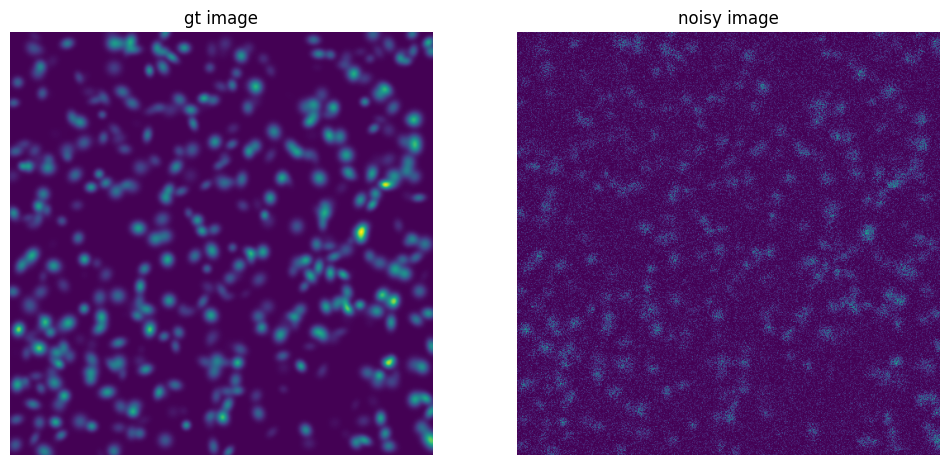

In [14]:
read_gt_img = tifffile.imread(os.path.join(gt_imgs_path, 'img_1.tif'))
read_noisy_img = tifffile.imread(os.path.join(noisy_imgs_path, 'img_1.tif'))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(read_gt_img)
axs[1].imshow(read_noisy_img)
axs[0].axis('off')
axs[0].set_title('gt image')
axs[1].axis('off')
axs[1].set_title('noisy image')

In [10]:
read_gt_img.shape

(512, 512)